# HassConsult House Prices Forecast.

Hass Consulting Company is a real estate leader with over 25 years of experience. The following is a study of the factors that affect housing prices using the given information on real estate properties. We are create the most accurate model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 

## 1. Defining the Question.

### a) Specifying the Question

The factors that affect housing prices using the given information on real estate properties and create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 

### b) Defining the Metric for Success

Selecting the regressor with the lowest mean standard error and most accurate prediction of house prices from the following:


*   Multiple Linear Regression
*   Quantile Regression
*   Ridge Regression
*   Lasso Regression
*   Elastic-Net Regression








### c) Context of the study

Determining the main factors that affect house pricing. This will help the company make more insightful and profitable decisions

### d) Recording the Experimental Design



1. Loading and reading data. 
2. Data cleaning. 
3. Exploratory analysis  
4. Modelling
5. Challenging the solution. 




## 2. Reading and checking the Data.

In [ ]:
# import libraries
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import scipy as sp
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import statsmodels.formula.api as smf
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.linear_model import ElasticNet

In [ ]:
# load the dataset
#
houses = pd.read_csv('http://bit.ly/IndependentProjectWeek7Dataset')
houses

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


The following is a summary of the columns in the dataset:

1. Id   
2. price  - Price of the house   
3. bedrooms - Number of Bedrooms
4. bathrooms - Number of Bathrooms
5. sqft_living - Square feet area of living area
6. sqft_lot  - Square feet area of parking Layout 
7. floors - Number of Floors
8. waterfront - Whether waterfront is there or not
9. view - Number of Views
10. grade - Grades
11. sqft_above
12. sqft_basement - Square feet area off basement
13. yr_built - Year the house is built
14. yr_renovated - Year the house is renovated
15. zipcode - zipcode os the house
16. lat : Latitude of the house
17. lon : Longitude of the house
18. sqft_living15
19. sqft_lot15   
   



In [ ]:
# previewing the top of our dataset
#
houses.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
# previewing the bottom of our dataset
#
houses.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [ ]:
# Determining the number of records and data types
# 
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

## 3. External Data Source Validation

### a.Validation

The data source is valid.

## 4. Tidying the Dataset

In [ ]:
# checking for missing values
#
houses.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
# checking for duplicates
#
houses.duplicated().sum()

3

In [ ]:
# drop duplicates
#
houses.drop_duplicates(subset = None, keep = 'first', inplace = True)

In [ ]:
# create new column to indicate whether a house was renovated or not
#
def my_function(x):
 
  if x['yr_renovated'] < x['yr_built']:
    Renovated = 'No'
  else:
    Renovated = 'Yes'
  return Renovated

houses['Renovated'] = houses.apply(my_function, axis=1)
houses.head()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Renovated
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,No
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,Yes
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,No
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,No
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,No


In [ ]:
# drop unwanted columns zipcode, lat and long are dropped 
# as they indicate the houses are located in roughly the same area
# yr built and renovated are replace by the renovated column
#
house_price = houses.drop(['id', 'lat', 'long', 'zipcode', 'yr_built', 'yr_renovated'], axis=1)
house_price.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,Renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1340,5650,No
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1690,7639,Yes
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,2720,8062,No
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1360,5000,No
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1800,7503,No


In [ ]:
house_price.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 21610 entries, 0 to 21612
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21610 non-null  float64
 1   bedrooms       21610 non-null  int64  
 2   bathrooms      21610 non-null  float64
 3   sqft_living    21610 non-null  int64  
 4   sqft_lot       21610 non-null  int64  
 5   floors         21610 non-null  float64
 6   waterfront     21610 non-null  int64  
 7   view           21610 non-null  int64  
 8   condition      21610 non-null  int64  
 9   grade          21610 non-null  int64  
 10  sqft_above     21610 non-null  int64  
 11  sqft_basement  21610 non-null  int64  
 12  sqft_living15  21610 non-null  int64  
 13  sqft_lot15     21610 non-null  int64  
 14  Renovated      21610 non-null  object 
dtypes: float64(3), int64(11), object(1)
memory usage: 2.6+ MB


In [ ]:
house_price.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
sqft_living15    0
sqft_lot15       0
Renovated        0
dtype: int64

In [ ]:
# checking and removing ouliers
#
columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'grade',
        'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15',]

Q1 = house_price[columns].quantile(0.25)
Q3 = house_price[columns].quantile(0.75)
IQR = Q3 - Q1

house_price1 = house_price[~((house_price[columns] < (Q1 - 1.5 * IQR)) | (house_price[columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

Outliers are removed for all regressors. However, quantile regression will have regressors included.

## 5. Exploratory Analysis

### Univariate Analysis.

In [ ]:
# basic computation of each column
#
house_price1.describe()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
count,1.662300e+04,16623.000000,16623.000000,16623.000000,16623.000000,16623.000000,16623.000000,16623.000000,16623.000000,16623.000000,16623.000000,16623.000000,16623.000000,16623.000000
mean,4.523032e+05,3.268844,1.984103,1838.524334,7054.914095,1.465921,0.001203,0.133008,3.415509,7.401011,1590.445948,248.078385,1815.770378,6932.389581
std,1.895648e+05,0.775231,0.649152,623.943661,3384.761289,0.544105,0.034667,0.551134,0.647602,0.811972,599.085518,366.867980,515.002390,3015.835962
min,8.200000e+04,2.000000,0.750000,560.000000,520.000000,1.000000,0.000000,0.000000,1.000000,6.000000,480.000000,0.000000,620.000000,651.000000
25%,3.053450e+05,3.000000,1.500000,1360.000000,4750.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1150.000000,0.000000,1440.000000,4820.000000
50%,4.190000e+05,3.000000,2.000000,1770.000000,7030.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1440.000000,0.000000,1720.000000,7168.000000
75%,5.640000e+05,4.000000,2.500000,2240.000000,9000.000000,2.000000,0.000000,0.000000,4.000000,8.000000,1920.000000,500.000000,2130.000000,8744.000000
max,1.130000e+06,5.000000,3.500000,4200.000000,19141.000000,3.500000,1.000000,4.000000,5.000000,9.000000,3740.000000,1400.000000,3640.000000,17550.000000


In [ ]:
# measures of central tendency not in the summary above
#
print(house_price1.median())

print('*' * 50)

print(house_price1.mode())



price            419000.0
bedrooms              3.0
bathrooms             2.0
sqft_living        1770.0
sqft_lot           7030.0
floors                1.0
waterfront            0.0
view                  0.0
condition             3.0
grade                 7.0
sqft_above         1440.0
sqft_basement         0.0
sqft_living15      1720.0
sqft_lot15         7168.0
dtype: float64
**************************************************
      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  350000.0         3        2.5         1300      5000     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  sqft_living15  \
0     0          3      7        1010              0           1540   

   sqft_lot15 Renovated  
0        5000        No  


In [ ]:
# measures of spread not in the summary above
#
print(house_price1.skew())
print('*' * 50)
print(house_price1.kurt())

price             0.820202
bedrooms          0.234152
bathrooms        -0.069663
sqft_living       0.523135
sqft_lot          0.555045
floors            0.780442
waterfront       28.780213
view              4.438503
condition         1.091482
grade             0.293370
sqft_above        0.951527
sqft_basement     1.216526
sqft_living15     0.708901
sqft_lot15        0.348153
dtype: float64
**************************************************
price              0.306913
bedrooms          -0.289445
bathrooms         -0.766823
sqft_living       -0.151187
sqft_lot           0.472199
floors            -0.206294
waterfront       826.400116
view              20.080003
condition          0.422379
grade             -0.391832
sqft_above         0.406866
sqft_basement      0.181642
sqft_living15      0.168792
sqft_lot15         0.243652
dtype: float64


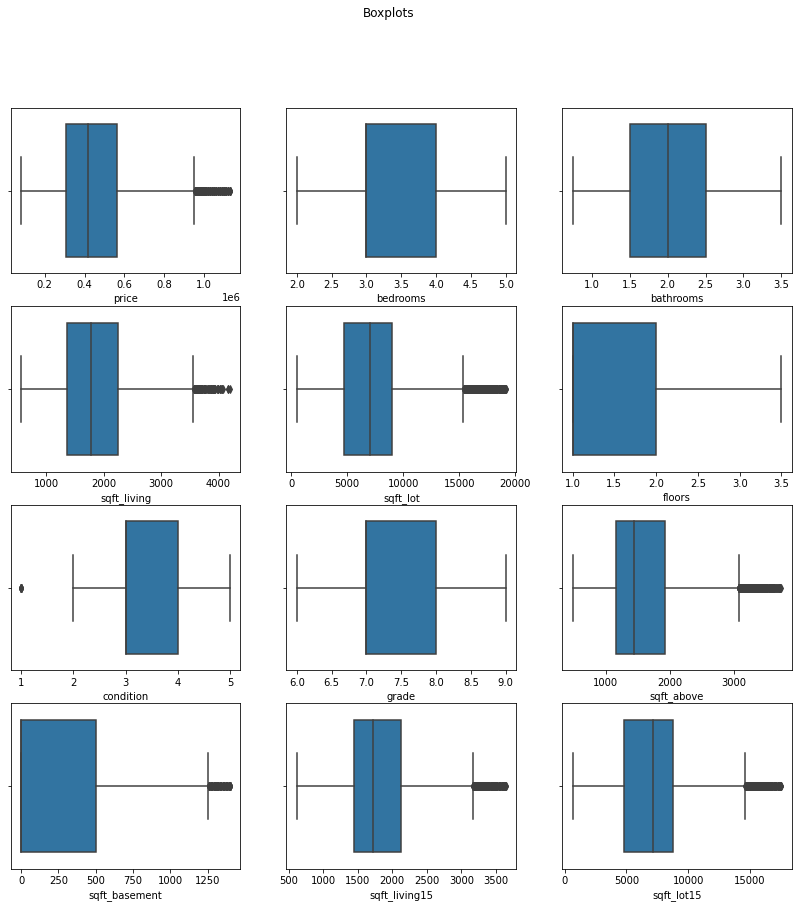

In [ ]:
# visualisation of the data above
# using box-plots
#
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12)) = plt.subplots(4,3, figsize=(14, 14))
fig.suptitle('Boxplots')
sb.boxplot(house_price1['price'], ax=ax1)
sb.boxplot(house_price1['bedrooms'], ax=ax2)
sb.boxplot(house_price1['bathrooms'], ax=ax3)
sb.boxplot(house_price1['sqft_living'], ax=ax4)
sb.boxplot(house_price1['sqft_lot'], ax=ax5)
sb.boxplot(house_price1['floors'], ax=ax6)
sb.boxplot(house_price1['condition'], ax=ax7)
sb.boxplot(house_price1['grade'], ax=ax8)
sb.boxplot(house_price1['sqft_above'], ax=ax9)
sb.boxplot(house_price1['sqft_basement'], ax=ax10)
sb.boxplot(house_price1['sqft_living15'], ax=ax11)
sb.boxplot(house_price1['sqft_lot15'], ax=ax12)
plt.show()


### Bivariate Analysis.

In [ ]:
# displaying a correlation table
#
house_price1.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
price,1.000000,0.240633,0.352138,0.525739,-0.076444,0.219651,0.059098,0.229105,0.082055,0.535743,0.399565,0.241661,0.459285,-0.084841
bedrooms,0.240633,1.000000,0.451445,0.608815,0.196718,0.131189,-0.007559,0.032891,0.024457,0.293691,0.477460,0.255751,0.399423,0.184797
bathrooms,0.352138,0.451445,1.000000,0.673583,-0.071462,0.513071,0.002855,0.067329,-0.145283,0.580814,0.590470,0.181362,0.498532,-0.076225
sqft_living,0.525739,0.608815,0.673583,1.000000,0.170848,0.313323,0.012267,0.139044,-0.060212,0.624942,0.820792,0.360399,0.709715,0.153022
sqft_lot,-0.076444,0.196718,-0.071462,0.170848,1.000000,-0.398321,0.030060,0.046215,0.136986,-0.019989,0.121816,0.091643,0.211129,0.877501
floors,0.219651,0.131189,0.513071,0.313323,-0.398321,1.000000,0.005363,-0.018387,-0.283869,0.459541,0.523064,-0.321272,0.233974,-0.404148
waterfront,0.059098,-0.007559,0.002855,0.012267,0.030060,0.005363,1.000000,0.240380,0.004528,-0.002180,0.001370,0.018626,0.016109,0.038167
view,0.229105,0.032891,0.067329,0.139044,0.046215,-0.018387,0.240380,1.000000,0.027022,0.114993,0.039675,0.171689,0.176214,0.052564
condition,0.082055,0.024457,-0.145283,-0.060212,0.136986,-0.283869,0.004528,0.027022,1.000000,-0.176168,-0.179992,0.191518,-0.112003,0.140404
grade,0.535743,0.293691,0.580814,0.624942,-0.019989,0.459541,-0.002180,0.114993,-0.176168,1.000000,0.630048,0.034006,0.598531,-0.011371


In [ ]:
# scatter map for all numeric values
#
sb.pairplot(house_price1)
plt.show()

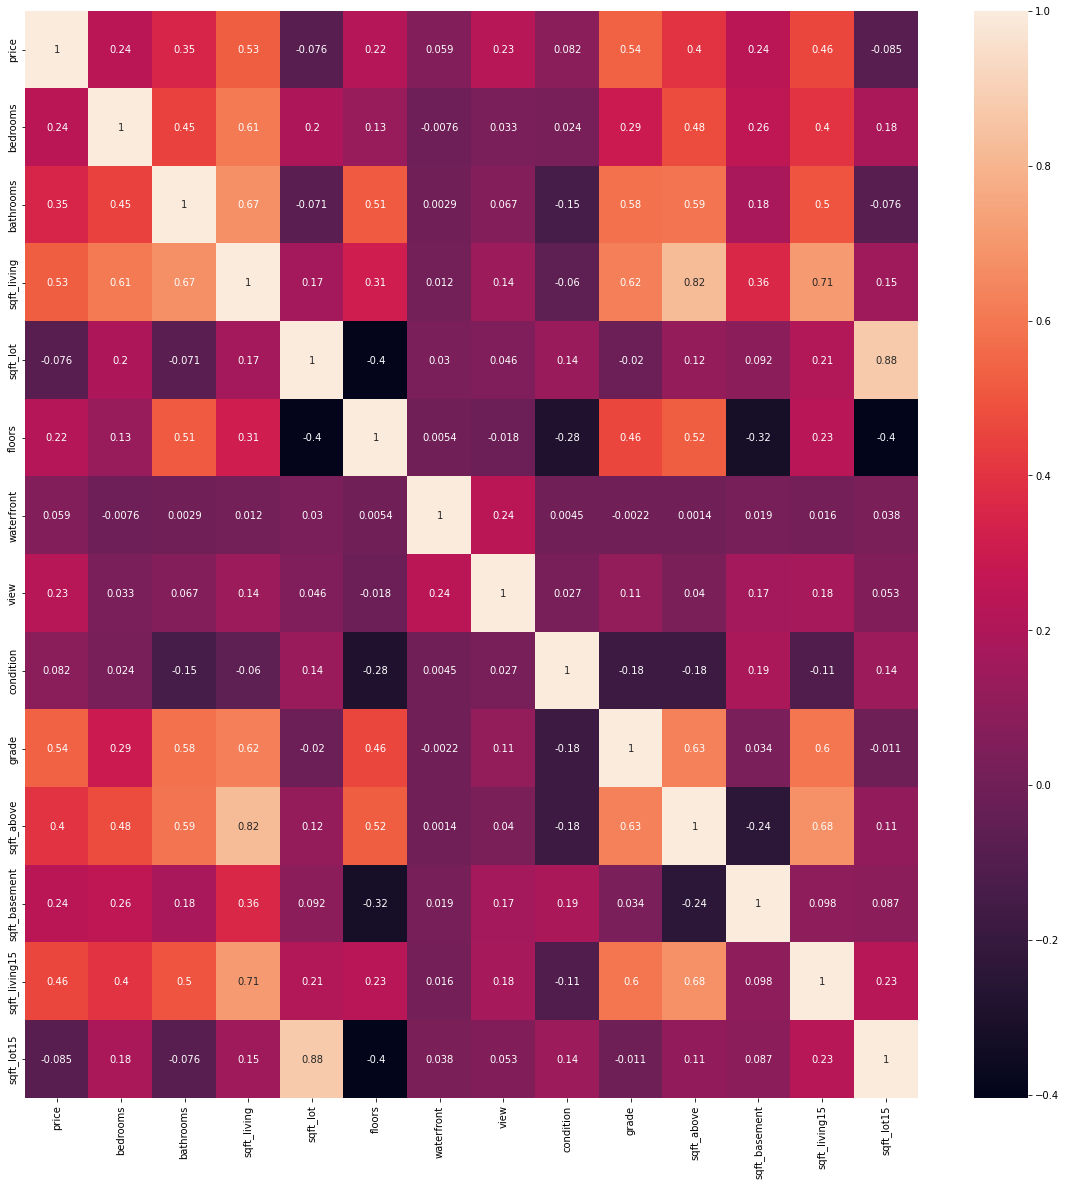

In [ ]:
# corelation heatmap
#
plt.figure(figsize = (20, 20))
sb.heatmap(house_price1.corr(),annot=True)
plt.show()

## 6. Implementing the Solution

### a) Multiple Linear Regression

In [ ]:
# Encoding columns with categorical variables
#
categorical_feature_mask = house_price1.dtypes==object
categorical_cols = house_price1.columns[categorical_feature_mask].tolist()

le = LabelEncoder()
house_price1[categorical_cols] = house_price1[categorical_cols].apply(lambda col: le.fit_transform(col))
house_price1[categorical_cols].head()

,Renovated
0,0
1,1
2,0
3,0
4,0


In [ ]:
# define dependent and independent variables 
# and divide into training and test sets
#
X = house_price1.drop(columns = ['price'])
y = house_price1['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [ ]:
# checking for multicollinearity using VIF
#
independent_only = house_price1.drop(columns=['price'])
correlations = independent_only.corr()
correlations

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,Renovated
bedrooms,1.000000,0.451445,0.608815,0.196718,0.131189,-0.007559,0.032891,0.024457,0.293691,0.477460,0.255751,0.399423,0.184797,0.009034
bathrooms,0.451445,1.000000,0.673583,-0.071462,0.513071,0.002855,0.067329,-0.145283,0.580814,0.590470,0.181362,0.498532,-0.076225,0.024197
sqft_living,0.608815,0.673583,1.000000,0.170848,0.313323,0.012267,0.139044,-0.060212,0.624942,0.820792,0.360399,0.709715,0.153022,0.033154
sqft_lot,0.196718,-0.071462,0.170848,1.000000,-0.398321,0.030060,0.046215,0.136986,-0.019989,0.121816,0.091643,0.211129,0.877501,-0.009303
floors,0.131189,0.513071,0.313323,-0.398321,1.000000,0.005363,-0.018387,-0.283869,0.459541,0.523064,-0.321272,0.233974,-0.404148,0.001209
waterfront,-0.007559,0.002855,0.012267,0.030060,0.005363,1.000000,0.240380,0.004528,-0.002180,0.001370,0.018626,0.016109,0.038167,0.031529
view,0.032891,0.067329,0.139044,0.046215,-0.018387,0.240380,1.000000,0.027022,0.114993,0.039675,0.171689,0.176214,0.052564,0.058038
condition,0.024457,-0.145283,-0.060212,0.136986,-0.283869,0.004528,0.027022,1.000000,-0.176168,-0.179992,0.191518,-0.112003,0.140404,-0.062007
grade,0.293691,0.580814,0.624942,-0.019989,0.459541,-0.002180,0.114993,-0.176168,1.000000,0.630048,0.034006,0.598531,-0.011371,-0.005438
sqft_above,0.477460,0.590470,0.820792,0.121816,0.523064,0.001370,0.039675,-0.179992,0.630048,1.000000,-0.237027,0.679231,0.106072,0.003448


In [ ]:
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,Renovated
bedrooms,1.685874,-0.286151,-5.095946e+00,-0.078235,0.035655,0.013416,0.074144,-0.061707,0.231205,3.925196e+00,2.364006e+00,0.071284,-0.102661,0.019116
bathrooms,-0.286151,2.427038,8.242302e+00,0.061983,-0.843664,-0.003463,0.059952,0.053322,-0.375703,-8.556295e+00,-5.651864e+00,-0.113483,0.002399,-0.017106
sqft_living,-5.129350,8.341006,-9.116830e+14,1.847648,-20.853306,-0.082195,2.617165,1.108842,2.547862,8.753612e+14,5.360537e+14,-14.260996,-7.265987,-0.489018
sqft_lot,-0.078235,0.061983,1.844214e+00,4.528192,0.472146,0.004218,-0.005423,-0.007262,0.109805,-2.377392e+00,-1.171721e+00,0.122960,-3.721067,0.008925
floors,0.035655,-0.843664,-2.075313e+01,0.472146,2.566351,-0.055062,-0.028049,0.180488,-0.381492,1.912399e+01,1.285349e+01,0.280007,0.480947,0.018748
waterfront,0.013416,-0.003463,-7.283441e-02,0.004218,-0.055062,1.066209,-0.264100,0.001564,0.040474,6.525677e-02,4.803597e-02,0.030084,-0.062326,-0.017724
view,0.074144,0.059952,2.564161e+00,-0.005423,-0.028049,-0.264100,1.138820,-0.027191,-0.069101,-2.393769e+00,-1.688413e+00,-0.228060,-0.000017,-0.061473
condition,-0.061707,0.053322,1.111934e+00,-0.007262,0.180488,0.001564,-0.027191,1.126039,0.074719,-1.103324e+00,-8.231406e-01,0.110604,-0.065785,0.082948
grade,0.231205,-0.375703,2.661887e+00,0.109805,-0.381492,0.040474,-0.069101,0.074719,2.156336,-3.296406e+00,-1.880344e+00,-0.570890,-0.070547,0.023303
sqft_above,3.939835,-8.743490,8.753612e+14,-2.350228,19.294521,0.074108,-2.463071,-1.112105,-3.169687,-8.404865e+14,-5.146971e+14,12.199044,7.097137,0.344001


In [ ]:
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,Renovated
bedrooms,1.685874,-0.286151,-5.095946e+00,-0.078235,0.035655,0.013416,0.074144,-0.061707,0.231205,3.925196e+00,2.364006e+00,0.071284,-0.102661,0.019116
bathrooms,-0.286151,2.427038,8.242302e+00,0.061983,-0.843664,-0.003463,0.059952,0.053322,-0.375703,-8.556295e+00,-5.651864e+00,-0.113483,0.002399,-0.017106
sqft_living,-5.129350,8.341006,-9.116830e+14,1.847648,-20.853306,-0.082195,2.617165,1.108842,2.547862,8.753612e+14,5.360537e+14,-14.260996,-7.265987,-0.489018
sqft_lot,-0.078235,0.061983,1.844214e+00,4.528192,0.472146,0.004218,-0.005423,-0.007262,0.109805,-2.377392e+00,-1.171721e+00,0.122960,-3.721067,0.008925
floors,0.035655,-0.843664,-2.075313e+01,0.472146,2.566351,-0.055062,-0.028049,0.180488,-0.381492,1.912399e+01,1.285349e+01,0.280007,0.480947,0.018748
waterfront,0.013416,-0.003463,-7.283441e-02,0.004218,-0.055062,1.066209,-0.264100,0.001564,0.040474,6.525677e-02,4.803597e-02,0.030084,-0.062326,-0.017724
view,0.074144,0.059952,2.564161e+00,-0.005423,-0.028049,-0.264100,1.138820,-0.027191,-0.069101,-2.393769e+00,-1.688413e+00,-0.228060,-0.000017,-0.061473
condition,-0.061707,0.053322,1.111934e+00,-0.007262,0.180488,0.001564,-0.027191,1.126039,0.074719,-1.103324e+00,-8.231406e-01,0.110604,-0.065785,0.082948
grade,0.231205,-0.375703,2.661887e+00,0.109805,-0.381492,0.040474,-0.069101,0.074719,2.156336,-3.296406e+00,-1.880344e+00,-0.570890,-0.070547,0.023303
sqft_above,3.939835,-8.743490,8.753612e+14,-2.350228,19.294521,0.074108,-2.463071,-1.112105,-3.169687,-8.404865e+14,-5.146971e+14,12.199044,7.097137,0.344001


In [ ]:
# Split data in training and test set
# fit linear regression model
# compute rmse
#
X = house_price1.drop(columns = ['price', 'sqft_lot', 'sqft_lot15'])
y = house_price1['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)


In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 111391.07814615646
Mean Squared Error: 19953193344.75096
Root Mean Squared Error: 141255.77278380858


In [ ]:
print(regressor.score(X_test, y_test))
print(regressor.score(X_train, y_train))

0.42593298291869264
0.43119912603469046


In [ ]:
# checking rmse after cross validation
#
y_pred = regressor.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 111391.07814615646
Mean Squared Error: 19953193344.75096
Root Mean Squared Error: 141255.77278380858


In [ ]:
# computing residuals
#
residuals = np.subtract(y_pred, y_test)
pd.DataFrame(residuals).describe()

residuals.mean()

-1014.1680829948887

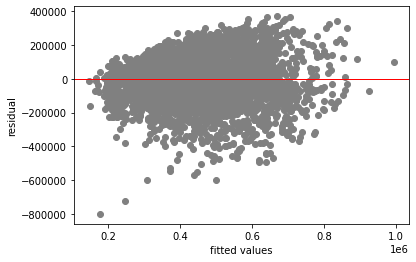

In [ ]:
# creating residual plots
#

plt.scatter(y_pred, residuals, color='grey')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

In [ ]:
# bartlett's test
#
test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)


if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

4855.027819052841
the variances are homogeneous!


In [ ]:
# checking accuracy of our model
#
print(regressor.score(X_test, y_test))
print(regressor.score(X_train, y_train))

0.42593298291869264
0.43119912603469046


Multiple linear regression has an accuracy of 43.1% for trained data.

### Quantile Regression

For quantile regression, we will use the dataset with outliers. this is because prediction will be done for the 0.25, 0.5 and 0.75 quantiles.

In [ ]:
# Encoding columns with categorical variables
#
categorical_feature_mask = house_price.dtypes==object
categorical_cols = house_price.columns[categorical_feature_mask].tolist()

le = LabelEncoder()
house_price[categorical_cols] = house_price[categorical_cols].apply(lambda col: le.fit_transform(col))
house_price[categorical_cols].head()

,Renovated
0,0
1,1
2,0
3,0
4,0


In [ ]:
# checking for multicollinearity using VIF
#
independent_only = house_price.drop(columns=['price', 'sqft_living'])
correlations = independent_only.corr()
correlations

,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,Renovated
bedrooms,1.000000,0.515935,0.031699,0.175448,-0.006583,0.079433,0.028422,0.357003,0.477619,0.303077,0.391633,0.029233,0.018406
bathrooms,0.515935,1.000000,0.087750,0.500669,0.063747,0.187891,-0.124940,0.664990,0.685351,0.283814,0.568665,0.087191,0.050401
sqft_lot,0.031699,0.087750,1.000000,-0.005171,0.021601,0.074753,-0.008967,0.113644,0.183527,0.015271,0.144620,0.718556,0.007780
floors,0.175448,0.500669,-0.005171,1.000000,0.023711,0.029325,-0.263779,0.458151,0.523874,-0.245673,0.279861,-0.011250,0.006075
waterfront,-0.006583,0.063747,0.021601,0.023711,1.000000,0.401993,0.016652,0.082785,0.072080,0.080585,0.086469,0.030702,0.093360
view,0.079433,0.187891,0.074753,0.029325,0.401993,1.000000,0.045836,0.251378,0.167659,0.276996,0.280404,0.072577,0.103347
condition,0.028422,-0.124940,-0.008967,-0.263779,0.016652,0.045836,1.000000,-0.144655,-0.158212,0.174071,-0.092854,-0.003424,-0.060386
grade,0.357003,0.664990,0.113644,0.458151,0.082785,0.251378,-0.144655,1.000000,0.755919,0.168443,0.713208,0.119265,0.013965
sqft_above,0.477619,0.685351,0.183527,0.523874,0.072080,0.167659,-0.158212,0.755919,1.000000,-0.051923,0.731870,0.194060,0.023126
sqft_basement,0.303077,0.283814,0.015271,-0.245673,0.080585,0.276996,0.174071,0.168443,-0.051923,1.000000,0.200367,0.017260,0.070960


In [ ]:
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,Renovated
bedrooms,1.639908,-0.418728,0.043379,0.084549,0.062393,0.108346,-0.086772,0.344589,-0.901462,-0.489281,0.018230,0.087078,0.017927
bathrooms,-0.418728,2.930939,-0.007251,-0.819044,-0.000489,0.051309,0.078795,-0.469152,-1.100771,-0.917707,0.039412,0.027738,-0.038458
sqft_lot,0.043379,-0.007251,2.087777,0.078125,0.028538,-0.054571,0.012992,-0.001041,-0.239737,-0.026299,0.128772,-1.473350,0.006056
floors,0.084549,-0.819044,0.078125,1.886785,-0.007251,-0.032954,0.203688,-0.386320,-0.385403,0.617771,0.340362,0.085077,0.014831
waterfront,0.062393,-0.000489,0.028538,-0.007251,1.203108,-0.491359,-0.010103,0.043553,-0.105685,0.000572,0.055866,-0.018124,-0.061352
view,0.108346,0.051309,-0.054571,-0.032954,-0.491359,1.384670,-0.054834,-0.145089,0.012345,-0.307961,-0.251765,0.012594,-0.081737
condition,-0.086772,0.078795,0.012992,0.203688,-0.010103,-0.054834,1.110510,0.076873,-0.049445,-0.157666,0.065177,-0.012721,0.081505
grade,0.344589,-0.469152,-0.001041,-0.386320,0.043553,-0.145089,0.076873,3.156217,-1.413982,-0.482565,-0.853292,0.098874,0.054816
sqft_above,-0.901462,-1.100771,-0.239737,-0.385403,-0.105685,0.012345,-0.049445,-1.413982,4.769861,1.323511,-1.589531,-0.195376,-0.105700
sqft_basement,-0.489281,-0.917707,-0.026299,0.617771,0.000572,-0.307961,-0.157666,-0.482565,1.323511,1.907710,-0.387494,-0.018586,-0.086263


In [ ]:
# fit linear regression model
#
X = house_price.drop(columns = ['price', 'sqft_living', 'sqft_above'])
y = house_price['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

reg = LinearRegression(fit_intercept = True, normalize = False)
reg.fit(X_train, y_train)


LinearRegression(normalize=False)

In [ ]:
# showing data for 0.25 quantile
# 

q_model = smf.quantreg('y ~ X', house_price)
res = q_model.fit(q=.25)

print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.2704
Model:                       QuantReg   Bandwidth:                   2.390e+04
Method:                 Least Squares   Sparsity:                    3.941e+05
Date:                Sun, 24 Apr 2022   No. Observations:                21610
Time:                        16:17:03   Df Residuals:                    21597
                                        Df Model:                           12
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6.074e+05   1.05e+04    -57.864      0.000   -6.28e+05   -5.87e+05
X[0]       -1.176e+04   1404.952     -8.370      0.000   -1.45e+04   -9006.326
X[1]         190.7422   2331.159      0.082      0.935   -4378.503    4759.987
X[2]           0.1744      0.041      4.257      0.0

In [ ]:
# showing data for 0.5 quantile
# 

q_model = smf.quantreg('y ~ X', house_price)
res = q_model.fit(q=.5)

print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.3359
Model:                       QuantReg   Bandwidth:                   2.710e+04
Method:                 Least Squares   Sparsity:                    3.773e+05
Date:                Sun, 24 Apr 2022   No. Observations:                21610
Time:                        16:17:07   Df Residuals:                    21597
                                        Df Model:                           12
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7.388e+05   1.29e+04    -57.199      0.000   -7.64e+05   -7.13e+05
X[0]       -3528.9677   1672.692     -2.110      0.035   -6807.567    -250.369
X[1]       -7224.2564   2726.280     -2.650      0.008   -1.26e+04   -1880.546
X[2]           0.2219      0.045      4.971      0.0

In [ ]:
# showing data for 0.75 quantile
# 

q_model = smf.quantreg('y ~ X', house_price)
res = q_model.fit(q=.75)

print(res.summary())

The model's coeffients have high error. thus the model isn't suitable.



### Ridge Regression

In [279]:
# define variables and split data into training and test sets
#
X = house_price1.drop(columns = ['price', 'sqft_lot', 'sqft_lot15'])
y = house_price1['price']

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)



In [280]:
# Fit linear regression
regression = LinearRegression()
regression.fit(X,y)

LinearRegression()

In [281]:
# checking the score and coeff of linear regression
#
print(regression.score(X_test, y_test))
print(regression.score(X_train, y_train))
print('*' * 50)
print(regression.coef_)
print(regression.intercept_)

0.4268338822125497
0.4310770036097682
**************************************************
[-1.55922059e+04 -3.62503036e+04  7.28187064e+01  4.28952953e+04
  1.22947406e+05  3.52098971e+04  4.87210384e+04  8.53147004e+04
 -4.56135317e+00  7.73800596e+01  4.73301431e+01  1.14817894e+05]
-526050.6492197055


In [282]:
# Determine the most appropriate value for the l2 regularization with a grid.
#
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

search.fit(X,y)
search.best_params_


{'alpha': 0.001}

In [283]:
# determine the best score
#
{'alpha': 0.001}
abs(search.best_score_) 

20547858896.911354

In [284]:
# fit ridge regressor
#
ridge = Ridge(normalize=True,alpha=0.001)
ridge.fit(X_train, y_train)

Ridge(alpha=0.001, normalize=True)

In [ ]:
# checking the score and coeff of ridge
#
print(ridge.score(X_test, y_test))
print(ridge.score(X_train, y_train))
print('*' * 50)
print(ridge.coef_)
print(ridge.intercept_)

In [286]:
y_pred = ridge.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 111396.58000266744
Mean Squared Error: 19952245134.05042
Root Mean Squared Error: 141252.4163830496


In [ ]:
print(pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}))


The accuracy score of Ridge regression is 43.1% for trained data. This may be due to limitations like:

* the model is usually unable to do feature selection.
* it shrinks coefficients. 



### Lasso Regression

In [287]:
X = house_price1.drop(columns = ['price', 'sqft_lot', 'sqft_lot15'])
y = house_price1['price']


sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X)

In [288]:
# Creating lasso object, fitting models and 
# Print scores, MSE, and coefficients
#
lasso = linear_model.Lasso() 

lasso.fit(X, y) 

print("lasso score:", lasso.score(X, y)) 
print("lasso MSE:", mean_squared_error(y, lasso.predict(X))) 
print("lasso coef:", lasso.coef_) 

lasso score: 0.4300572645519316
lasso MSE: 20479547525.042564
lasso coef: [-1.55911195e+04 -3.62419466e+04  1.65972405e+02  4.28876191e+04
  1.22078668e+05  3.52212480e+04  4.87170099e+04  8.53103927e+04
 -9.77142179e+01 -1.57789067e+01  4.73277580e+01  1.14789561e+05]


In [289]:
# Making necessary imports, split data into training and test sets, and choose a set of parameters 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 



In [290]:
# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train) 
linear.fit(X_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_test, y_test))
print("linear score:", linear.score(X_test, y_test))
print('*' * 50)
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test)))
print('*' * 50)
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

lasso best parameters: {'alpha': 0.1}
lasso score: 0.42593287044594064
linear score: 0.42593298291869264
**************************************************
lasso MSE: 19953197254.0342
linear MSE: 19953193344.75096
**************************************************
lasso best estimator coef: [-1.33638968e+04 -3.74385785e+04  1.66544292e+02  4.38386461e+04
  1.15792375e+05  3.52274469e+04  5.04449873e+04  8.68986750e+04
 -9.86621490e+01 -1.67764270e+01  4.63822225e+01  1.14947639e+05]
linear coef: [-1.33640513e+04 -3.74393728e+04  7.25501432e+01  4.38394615e+04
  1.15885168e+05  3.52263075e+04  5.04454013e+04  8.68990369e+04
 -4.66809440e+00  7.72182375e+01  4.63825564e+01  1.14950424e+05]


In [ ]:
# comparing actual and predicted values
# for lasso
y_pred = gridlasso.predict(X_test)
print(pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}))


The accuracy of the Lasso model is 42.6% for trained data. Possible limitations are:

*  If it does not do grouped selection it will select only one variable and ignore the rest.




### Elastic Net Regression

In [291]:
# define the dependent and independent variables
#
X = house_price1.drop(columns = ['price', 'sqft_lot', 'sqft_lot15'])
y = house_price1['price']

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X)

In [292]:
# fit linear regression model
#
regression=LinearRegression()
regression.fit(X,y)
lin_model=(mean_squared_error(y_true=y,y_pred=regression.predict(X)))
print(lin_model)

20479546613.80506


In [293]:
# coefficients of the linear model.
# 
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'Renovated': 114817.89393402342,
 'bathrooms': -36250.303584727546,
 'bedrooms': -15592.205919299373,
 'condition': 48721.03837648706,
 'floors': 42895.295259726816,
 'grade': 85314.70039201368,
 'sqft_above': -4.56135316777727,
 'sqft_basement': 77.38005956006145,
 'sqft_living': 72.81870636487656,
 'sqft_living15': 47.33014312607156,
 'view': 35209.897104661,
 'waterfront': 122947.40613242742}

In [295]:
# normalize and create the grid.
# 
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),
       'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [296]:
# display the best parameters
# 
search.fit(X,y)
search.best_params_


{'alpha': 1e-05, 'l1_ratio': 0.8}

In [297]:
abs(search.best_score_)

20557679457.067238

In [298]:
# Fit model and get MSE of the elastic model
#
elastic=ElasticNet(normalize=True,alpha=0.00001,l1_ratio=0.8)
elastic.fit(X,y)
elastic_model=(mean_squared_error(y_true=y,y_pred=elastic.predict(X)))
print(elastic_model)

20496839421.89571


In [ ]:
# coefficients of the linear model.
# 
coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

In [303]:
# checking accuracy of the model
#
print(elastic.score(X, y))

0.4295760336564973


The accuracy of the Elastic Net model is 42.9%. This may be due to double shrinkage which leads to bias and poor prediction.

## 7. Challenging the solution

 In all of the above models independent variables like time and geographical location were dropped. This is due to the fact that their numeric quantifiers would have been misinterpreted by the machine as numerical data. 

 More feature selection techniques e.g decision trees, k-means clustering etc need to be included while preparing the data. If this does not improve the accuracy a regression model built specifically for this data would be appropriate.



## 8. Follow up questions

### a). Did we have the right data?

Yes.

### b). Do we need other data to answer our question?

Yes.

### c). Did we have the right question?

Yes, though the regression models present could not give predictions with the desired accuracy.